# MODEL ที่จะทำ
- KNN
- Decision Tree
- SVM

In [112]:
import pandas as pd
import numpy as np

# plot
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

In [67]:
pd.set_option("display.precision", 5)

# Read Data

In [3]:
df_raw = pd.read_csv('./log2.csv')
display(df_raw)

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


# CLEAN & EDA

In [4]:
df_raw.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  object
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object

ข้อมูล Target Column (Action) เป็น String แต่มาเป็น Object จึง Cast ให้เป็น String Column

In [5]:
df = df_raw.copy()#df_raw.loc[df_raw['Action'] != 'reset-both']
df['Action'] = df['Action'].astype('string')
df.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  string
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object

## CHECK MISSING VALUES

In [6]:
print(df.isna().sum())

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64


ข้อมูลไม่มี NA เลย

In [7]:
print('จำนวน Row :',df.shape[0])
print('จำนวน Column :', df.shape[1])

จำนวน Row : 65532
จำนวน Column : 12


In [8]:
df.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


## Check Distribution

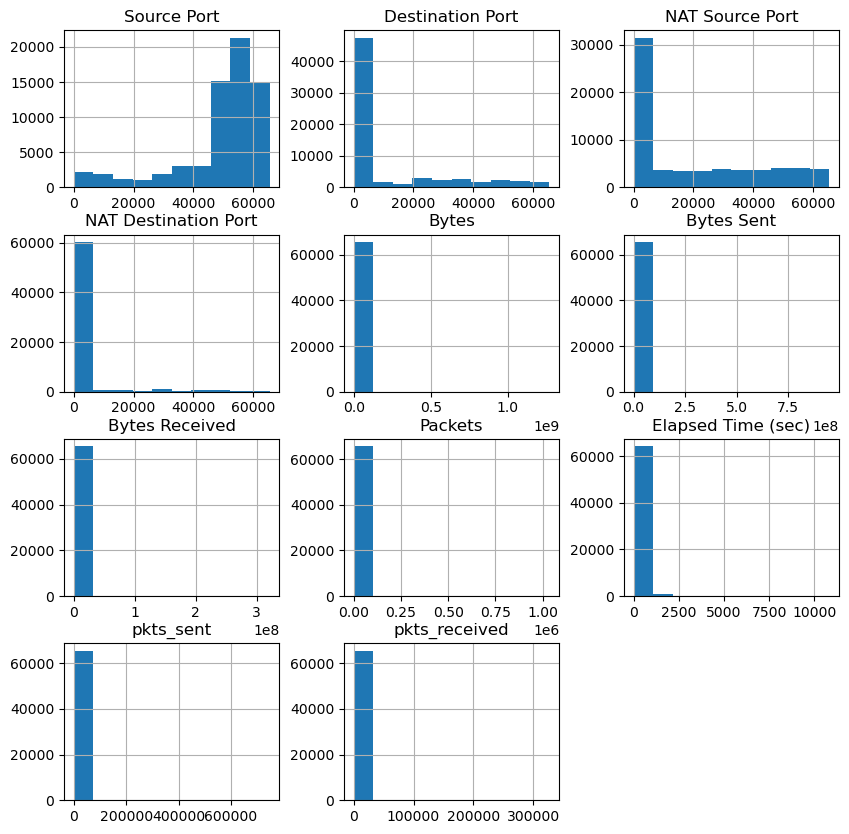

In [9]:
a = df.hist(figsize= (10,10))

## แบ่ง Column ระหว่างที่เป็น Categorical กับ Numerical

In [10]:
# column ที่เป็น Category
lst_cat = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Action']
lst_num =  [x for x in list(df.columns) if x not in lst_cat]
print('Cateorigal columns :', lst_cat)
print('Numerical Column',lst_num)

Cateorigal columns : ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Action']
Numerical Column ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received']


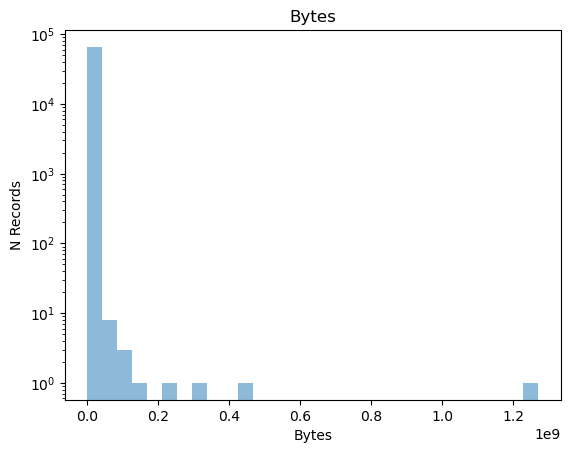

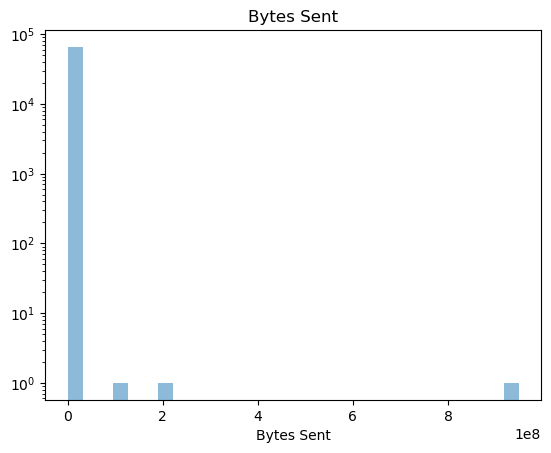

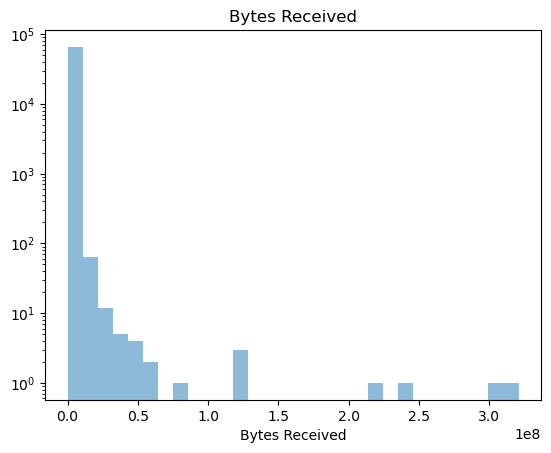

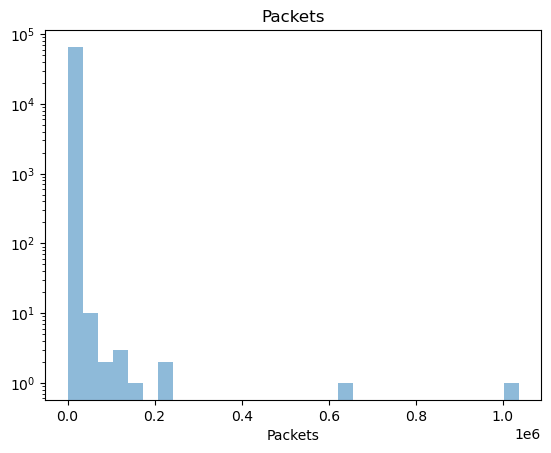

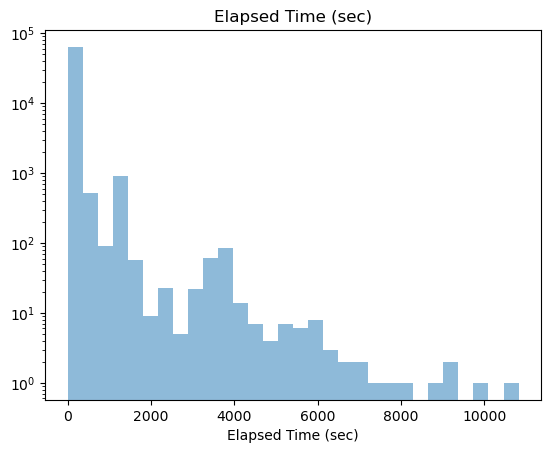

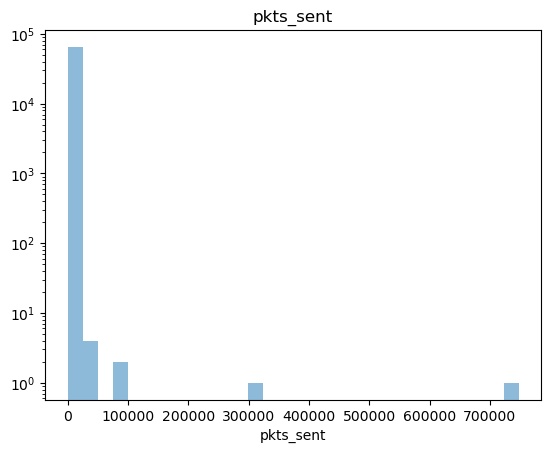

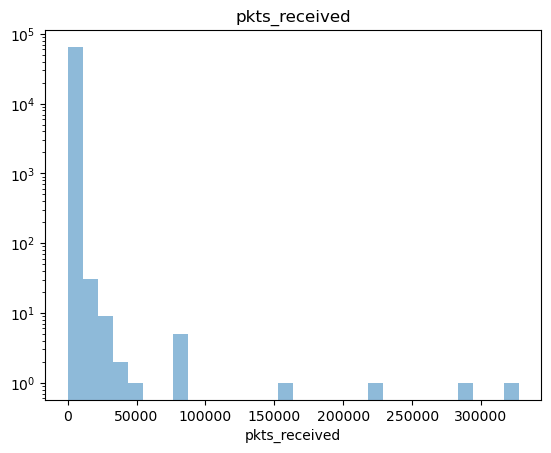

In [11]:
# logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
# plt.title('Numerical Column Distribution')
# plt.xlim(0.1)
plt.ylabel('N Records',loc='center')
for col in lst_num:
    plt.title(col)
    plt.yscale('log')
    # plt.xscale('log')
    plt.xlabel(col)
    plt.hist(df[col], alpha=0.5, bins= 30 )
    
    plt.show()

In [12]:
df[lst_num].describe()

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


Column ที่เป็นตัวเลขทุก Column มีการกระจายของข้อมูลแบบ Positive Skew 
มีการกระจุกตัวค่อนข้างสูง และมี Outlier ที่ SD สูงมาก

## Check number unique in category columns

TOTAL RECORD :	 65532
Source Port N uqnie :34.68		
Destination Port N uqnie :4.99		
NAT Source Port N uqnie :44.49		
NAT Destination Port N uqnie :3.87		


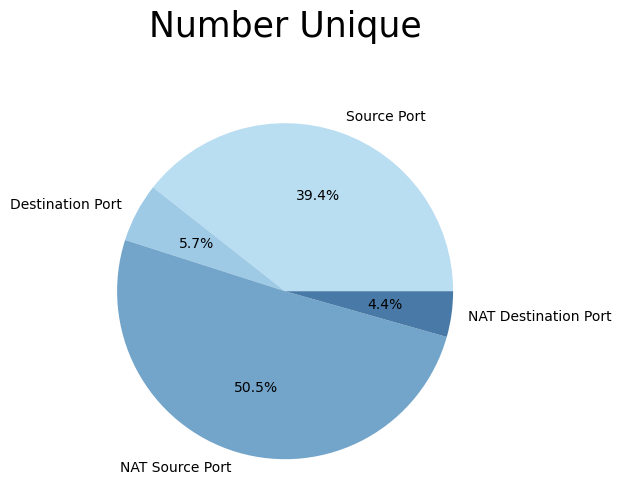

In [13]:
pie_dct = {}

colors = ["#B9DDF1", "#9FCAE6", "#73A4CA", "#497AA7"]

print('TOTAL RECORD :\t', len(df))
plt.title('Number Unique', pad= 50, fontsize=  25)
for i in lst_cat:
    if i == 'Action':
        continue
    percent = df[i].nunique() / len(df)
    print('{} N uqnie :{:.2f}\t\t'.format(i, percent*100))
    pie_dct[i] = percent

# Data to plot
labels = []
sizes = []

for x, y in pie_dct.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels,  autopct = '%1.1f%%', colors= colors)

plt.axis('equal')
plt.show()


In [14]:
# df.loc[df['pkts_sent'] != 1]

## เช็คดูจำนวนแต่ละ Action (target column) มีปริมาณอย่างไร

In [111]:
df_flag = df
df_flag['count'] = 1
# for i in 
df_flag.groupby('Action').sum('count')['count']

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

มีเพียง Reset-both ที่มีปริมาณน้อยมาก

In [93]:
print(df.loc[df['Source Port'] == 0]['Action'].unique())
print('Total rows Source Port == 0  :',len(df.loc[df['Source Port'] == 0]['Action']))
print('ข้อมูลที่ Source Port เป็น 0 มีทั้ง Allow และ Deny')

<StringArray>
['deny', 'allow']
Length: 2, dtype: string
Total rows Source Port == 0  : 173
ข้อมูลที่ Source Port เป็น 0 มีทั้ง Allow และ Deny


In [50]:
for col in lst_num:
    print('#'*20)
    print(col)
    print(' Max Bytes :',df[col].sort_values(ascending= False).iloc[0])
    print(' Min Bytes :',df[col].sort_values(ascending =True).iloc[0])

####################
Bytes
 Max Bytes : 1269359015
 Min Bytes : 60
####################
Bytes Sent
 Max Bytes : 948477220
 Min Bytes : 60
####################
Bytes Received
 Max Bytes : 320881795
 Min Bytes : 0
####################
Packets
 Max Bytes : 1036116
 Min Bytes : 1
####################
Elapsed Time (sec)
 Max Bytes : 10824
 Min Bytes : 0
####################
pkts_sent
 Max Bytes : 747520
 Min Bytes : 1
####################
pkts_received
 Max Bytes : 327208
 Min Bytes : 0


- ข้อมูลแต่ละ Column มีตัวเลขที่ต่างกันมากทั้งใน Column นั้นเอง และกับ Column อื่นๆ

- รวมถึงข้อมูลมี Positive Skew 

- จึงเลือกใช้วิธี MinMax Scaler เพื่อทำให้ข้อมูลอยู่ใน range 0-1

# Data Tranform

In [84]:
# ทำ MinMax Scaler เฉพาะ Column ที่เป็น Packets, และ Bytes ทั้ง Sent, Received
 
df_mm_scaled = df

mm_scaler = MinMaxScaler()
mm_scaler.fit_transform(df[lst_num])
df_mm_scaled[lst_num] = mm_scaler.transform(df_mm_scaled[lst_num])
  
# df_mm_scaled.round(5)
df_mm_scaled
# df_x_scaled = pd.DataFrame(df_mm_scaled, columns= lst_num)
# df_x_scaled

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,9.21725e-08,3.58469e-08,2.58662e-07,9.65144e-07,0.00277,0.00000e+00,3.05616e-06
1,56258,3389,56258,3389,allow,3.70896e-06,1.62366e-06,9.87279e-06,1.73726e-05,0.00157,1.20398e-05,2.75054e-05
2,6881,50321,43265,50321,allow,1.40228e-07,6.11507e-08,3.73969e-07,9.65144e-07,0.11077,0.00000e+00,3.05616e-06
3,50553,3389,50553,3389,allow,2.57374e-06,1.45286e-06,5.88690e-06,1.35120e-05,0.00157,9.36431e-06,2.13931e-05
4,50002,443,45848,443,allow,1.99297e-05,7.08293e-06,5.79029e-05,2.89543e-05,0.00148,1.60531e-05,5.50109e-05
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,2.00101e-07,1.39170e-07,3.80202e-07,4.82572e-06,0.00139,4.01328e-06,6.11232e-06
65528,50964,80,13485,80,allow,3.68744e-03,7.09052e-05,1.43773e-02,4.51108e-03,0.00711,1.31635e-03,1.12772e-02
65529,54871,445,0,0,drop,7.87799e-09,1.05432e-08,0.00000e+00,0.00000e+00,0.00000,0.00000e+00,0.00000e+00
65530,54870,445,0,0,drop,7.87799e-09,1.05432e-08,0.00000e+00,0.00000e+00,0.00000,0.00000e+00,0.00000e+00


In [87]:
# df_mean_byte = pd.DataFrame(df.groupby('Source Port').agg('mean')['Bytes'])
# plt.hist(df_mean_byte['Bytes'], bins= 50)
# plt.xlabel('Average Bytes')
# plt.xscale('log')
# plt.yscale('log')


# Train Model เฉพาะ Columns ที่เป็นตัวเลข

## TrainTest Split

In [116]:
#train&test split



y_train, y_test = train_test_split(df_mm_scaled['Action'], test_size=0.2, random_state=42)
# display(y_train, y_test)

x_train, x_test = train_test_split(df_mm_scaled[['Bytes', 'Bytes Sent', 'Bytes Received', 'Elapsed Time (sec)', 'Packets']], test_size=0.2, random_state=42)
# display(x_train, x_test)

## Model

### KNN

In [117]:
#Modeling

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#----- KNN -----
knn = KNeighborsClassifier()
params = {'n_neighbors': range(5,10),'algorithm' : ['auto', 'ball_tree']}

#training
KNN_grid = GridSearchCV(estimator = knn, param_grid = params, cv=5)
KNN_grid.fit(x_train, y_train)

print('KNN Best Params:', KNN_grid.best_params_)
print('KNN Best Score:', KNN_grid.best_score_)

#testing
KNN_grid_pred = KNN_grid.predict(x_test)
print(classification_report(y_test, KNN_grid_pred))

KNN Best Params: {'algorithm': 'auto', 'n_neighbors': 6}
KNN Best Score: 0.9324558893657606
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       0.78      1.00      0.88      2994
        drop       0.99      0.67      0.80      2562
  reset-both       0.75      0.50      0.60         6

    accuracy                           0.94     13107
   macro avg       0.88      0.79      0.82     13107
weighted avg       0.95      0.94      0.93     13107



### Random Forest

In [118]:
#----- Random Forest -----
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0)
forest_params = {'n_estimators' : range(10, 51, 2),
                 'criterion' : ['entropy', 'gini']}

#training                 
forest_grid = GridSearchCV(estimator = forest, param_grid = forest_params, cv=5)
forest_grid.fit(x_train, y_train)

print('Random Forest Best Params:', forest_grid.best_params_)
print('Random Forest Best Score:', forest_grid.best_score_)

#testing
forest_grid_pred = forest_grid.predict(x_test)
print(classification_report(y_test, forest_grid_pred))

Random Forest Best Params: {'criterion': 'entropy', 'n_estimators': 28}
Random Forest Best Score: 0.8024988078206962
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       0.54      1.00      0.70      2994
        drop       0.00      0.00      0.00      2562
  reset-both       1.00      0.50      0.67         6

    accuracy                           0.80     13107
   macro avg       0.63      0.62      0.59     13107
weighted avg       0.70      0.80      0.74     13107



e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm_params = [{'kernel':['linear'], 'C':[0.1, 1, 5, 10, 50]}]

#training
svm_grid = GridSearchCV(estimator = svm, param_grid = svm_params, cv=5)
svm_grid.fit(x_train, y_train)

print('SVM Best Params:', svm_grid.best_params_)
print('SVM Best Score:', svm_grid.best_score_)

#testing
svm_grid_pred = svm_grid.predict(x_test)
print(classification_report(y_test, svm_grid_pred))

## Ramdom forest ได้ Accuracy ต่ำ จึงลองดู Features importance impurity-based

In [120]:
feature_names = [f"feature {i}" for i in range(x_train.shape[1])]
forest = RandomForestClassifier(random_state=42, n_estimators= 28 ,criterion= 'entropy',)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=28, random_state=42)

Elapsed time to compute the importances: 0.004 seconds


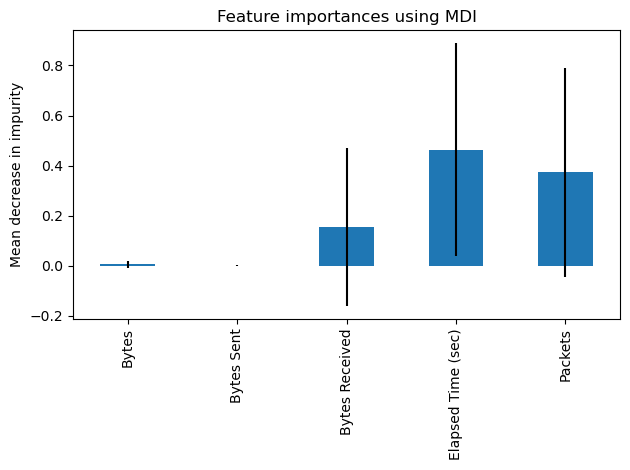

In [129]:
import time
# import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=x_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Model 2
## นำ Column Port และ NAT เข้ามาร่วมในการ Train ด้วย

## ลอง Explore Soure Port ดู

In [150]:
df_mm_scaled.groupby(['Source Port', 'Action']).sum('flag').sort_values('flag', ascending= False)['flag']

Source Port  Action
58638        deny      789
27005        allow     513
443          deny      267
57470        allow     221
49418        allow     205
                      ... 
52757        drop        1
             allow       1
52755        drop        1
52754        drop        1
65534        allow       1
Name: flag, Length: 31757, dtype: int64

เห็นได้ว่า Source Port ซ้ำๆ ที่มีการ Allow หรือ Deny จะมี Action เดิมเกิดซ้ำๆ

### ลองดูจำนวนว่า การเกิด Action ใน 1 Source Port เป็นอย่างไร

In [202]:
df_mm_scaled.loc[df['Source Port'] == 57222]

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,flag,count
0,57222,53,54587,53,allow,9.21725e-08,3.58469e-08,2.58662e-07,9.65144e-07,0.00277,0.0,3.05616e-06,1,1
18,57222,53,51448,53,allow,9.21725e-08,3.58469e-08,2.58662e-07,9.65144e-07,0.00277,0.0,3.05616e-06,1,1
40721,57222,445,0,0,drop,4.72680e-09,6.32593e-09,0.00000e+00,0.00000e+00,0.00000,0.0,0.00000e+00,1,1


In [177]:
df_mm_scaled.loc[df['Source Port'] ==  58638]['Action']

1457     allow
1461     allow
1483     allow
1486     allow
1488     allow
         ...  
7924      deny
7925      deny
7927      deny
7928      deny
51839     drop
Name: Action, Length: 840, dtype: string

In [178]:
df_mm_scaled.loc[df['NAT Destination Port'] == 53]['Action'].unique()
df_mm_scaled.groupby(['NAT Destination Port', 'Action']).sum('flag').sort_values('flag', ascending= False)

Source Port  Destination Port  NAT Source Port  \
NAT Destination Port Action                                                   
53                   allow     828952789            799982        505330975   
0                    deny      577381086         508087895                0   
                     drop      732998027           5718695                0   
443                  allow     582210768           5172911        400871415   
80                   allow     198924706            322240        141039481   
...                                  ...               ...              ...   
30982                allow         37965             30982             7359   
30840                allow         53098             30840            23341   
30815                allow         53558             30815            59383   
30773                allow         50584             30773            22058   
65535                allow         50265             65535            43978   

                                   Bytes   Bytes Sent  Bytes Received  \
NAT Destination Port Action                                             
53                   allow   3.90281e-03  2.24094e-03     8.81502e-03   
0                    deny    2.69915e-04  3.61231e-04     0.00000e+00   
                     drop    8.78286e-05  1.17542e-04     0.00000e+00   
443                  allow   2.70801e+00  1.40646e-01     1.02967e+01   
80                   allow   7.82006e-01  2.71707e-02     3.01318e+00   
...                                  ...          ...             ...   
30982                allow   3.68690e-07  4.93423e-07     0.00000e+00   
30840                allow   6.60176e-07  4.15403e-07     1.38369e-06   
30815                allow   3.40329e-07  2.59363e-07     5.79653e-07   
30773                allow   1.02099e-06  2.53037e-07     3.29093e-06   
65535                allow   1.27623e-07  7.59112e-08     2.80477e-07   

                                 Packets  Elapsed Time (sec)    pkts_sent  \
NAT Destination Port Action                                                 
53                   allow   3.56071e-02            43.75102  2.68167e-02   
0                    deny    2.31635e-05             0.00000  3.21062e-05   
                     drop    0.00000e+00             0.00000  0.00000e+00   
443                  allow   3.42525e+00           140.93219  1.43873e+00   
80                   allow   9.31697e-01            27.37546  3.84656e-01   
...                                  ...                 ...          ...   
30982                allow   7.72115e-06             0.11077  1.07021e-05   
30840                allow   1.15817e-05             0.00203  9.36431e-06   
30815                allow   6.75601e-06             0.00148  5.35103e-06   
30773                allow   4.82572e-06             0.11086  2.67552e-06   
65535                allow   2.89543e-06             0.11179  2.67552e-06   

                             pkts_received   flag  count  
NAT Destination Port Action                               
53                   allow     5.14871e-02  15094  15094  
0                    deny      0.00000e+00  14975  14975  
                     drop      0.00000e+00  12851  12851  
443                  allow     7.55933e+00  11677  11677  
80                   allow     2.07149e+00   4028   4028  
...                                    ...    ...    ...  
30982                allow     0.00000e+00      1      1  
30840                allow     1.52808e-05      1      1  
30815                allow     9.16848e-06      1      1  
30773                allow     9.16848e-06      1      1  
65535                allow     3.05616e-06      1      1  

[2540 rows x 12 columns]

- เห็นได้ว่า เมื่อ Source Port และ NAT Destination Port ที่เกิดขึ้น มักเกิด Action ขึ้นซ้ำๆ

- ดังจึงคิดว่า นั้นข้อมูลด้าน Port และ Nat จะมีความสำคัญต่อ Model

## เดิมข้อมูล Port ต่างๆมาเป็น Int แต่ Port ควรจะเป็นข้อมูลประเภท Category

## OneHot Encode Port Columns

In [179]:
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder

In [198]:
df_mm_scaled.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received', 'flag', 'count'],
      dtype='object')

In [200]:
df_mm = df_mm_scaled[['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received']]

train, test = train_test_split(df_mm, test_size= 0.2, random_state= 42)
y_train = train.pop('Action')
X_train = train


In [204]:
lst_cat

['Source Port',
 'Destination Port',
 'NAT Source Port',
 'NAT Destination Port',
 'Action']

In [22]:
data_encoded = pd.get_dummies(df_mm, columns= lst_cat)
data_encoded

,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_0,Source Port_5,...,NAT Destination Port_64932,NAT Destination Port_65054,NAT Destination Port_65100,NAT Destination Port_65128,NAT Destination Port_65253,NAT Destination Port_65264,NAT Destination Port_65387,NAT Destination Port_65427,NAT Destination Port_65534,NAT Destination Port_65535
0,allow,177,94,83,2,30,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,allow,4768,1600,3168,19,17,10,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,allow,238,118,120,2,1199,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,allow,3327,1438,1889,15,17,8,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,allow,25358,6778,18580,31,16,13,18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,allow,314,192,122,6,15,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
65528,allow,4680740,67312,4613428,4675,77,985,3690,0,0,...,0,0,0,0,0,0,0,0,0,0
65529,drop,70,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65530,drop,70,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### ! ข้อมูล Port มากเกินไป เมื่อทำออกมาจึงมีลักษณะ Wide column เกินที่ Computer จะรับไหว

In [31]:
data_encoded2 = data_encoded.iloc[:,:10000]
data_encoded2

,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_0,Source Port_5,...,Source Port_50848,Source Port_50849,Source Port_50850,Source Port_50851,Source Port_50852,Source Port_50853,Source Port_50854,Source Port_50856,Source Port_50857,Source Port_50858
0,allow,177,94,83,2,30,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,allow,4768,1600,3168,19,17,10,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,allow,238,118,120,2,1199,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,allow,3327,1438,1889,15,17,8,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,allow,25358,6778,18580,31,16,13,18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,allow,314,192,122,6,15,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
65528,allow,4680740,67312,4613428,4675,77,985,3690,0,0,...,0,0,0,0,0,0,0,0,0,0
65529,drop,70,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65530,drop,70,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(data_encoded2.drop('Action', axis=1), data_encoded2['Action'], test_size=0.2, random_state=42)

## แก้ด้วยการแปลง Port columns ต่างๆให้เป็น String

In [208]:

df_mm_str = df_mm
for i in lst_cat:
    df_mm_str[i] = df_mm[i].astype('string')

df_mm_str.dtypes


C:\Users\kimte\AppData\Local\Temp\ipykernel_19276\3928313191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mm_str[i] = df_mm[i].astype('string')


Source Port              string
Destination Port         string
NAT Source Port          string
NAT Destination Port     string
Action                   string
Bytes                   float64
Bytes Sent              float64
Bytes Received          float64
Packets                 float64
Elapsed Time (sec)      float64
pkts_sent               float64
pkts_received           float64
dtype: object

## Train Test Split สำหรับ Data ใหม่

In [214]:
df_mm_str.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [215]:
#train&test split

y_train2, y_test2 = train_test_split(df_mm_str['Action'], test_size=0.2, random_state=42)
# display(y_train, y_test)

x_train2, x_test2 = train_test_split(df_mm_str[df_mm_str.columns.drop('Action')], test_size=0.2, random_state=42)
# display(x_train, x_test)

## KNN (all features)

In [219]:
#Modeling

# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report

#----- KNN -----
knn = KNeighborsClassifier()
params = {'n_neighbors': range(5,10),'algorithm' : ['auto', 'ball_tree']}

#training
KNN_grid = GridSearchCV(estimator = knn, param_grid = params, cv=5)
KNN_grid.fit(x_train2, y_train2)

print('KNN Best Params:', KNN_grid.best_params_)
print('KNN Best Score:', KNN_grid.best_score_)

#testing
KNN_grid_pred = KNN_grid.predict(x_test2)
print(classification_report(y_test2, KNN_grid_pred))

KNN Best Params: {'algorithm': 'auto', 'n_neighbors': 5}
KNN Best Score: 0.9920076299475442
              precision    recall  f1-score   support

       allow       1.00      0.99      0.99      7545
        deny       0.98      0.99      0.99      2994
        drop       1.00      1.00      1.00      2562
  reset-both       0.00      0.00      0.00         6

    accuracy                           0.99     13107
   macro avg       0.74      0.75      0.74     13107
weighted avg       0.99      0.99      0.99     13107



e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### KNN ผลลัพธ์ดีขึ้นมาก เมื่อเทียบกัข้อมูลที่ไม่ใช้ Port

## Random Forest (all features)

In [221]:
#----- Random Forest -----
from sklearn.ensemble import RandomForestClassifier

forest2 = RandomForestClassifier(random_state = 0)
forest_params2 = {'n_estimators' : range(10, 51, 2),
                 'criterion' : ['entropy', 'gini']}

#training                 
forest_grid2 = GridSearchCV(estimator = forest2, param_grid = forest_params2, cv=5)
forest_grid2.fit(x_train2, y_train2)

print('Random Forest Best Params:', forest_grid2.best_params_)
print('Random Forest Best Score:', forest_grid2.best_score_)

#testing
forest_grid_pred2 = forest_grid2.predict(x_test2)
print(classification_report(y_test2, forest_grid_pred2))

Random Forest Best Params: {'criterion': 'entropy', 'n_estimators': 10}
Random Forest Best Score: 0.9979971387696709
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      0.50      0.67         6

    accuracy                           1.00     13107
   macro avg       1.00      0.87      0.92     13107
weighted avg       1.00      1.00      1.00     13107



In [222]:
print('ramdom forest แบบเก่า ')
#testing
forest_grid_pred = forest_grid.predict(x_test)
print(classification_report(y_test, forest_grid_pred))

ramdom forest แบบเก่า 
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       0.54      1.00      0.70      2994
        drop       0.00      0.00      0.00      2562
  reset-both       1.00      0.50      0.67         6

    accuracy                           0.80     13107
   macro avg       0.63      0.62      0.59     13107
weighted avg       0.70      0.80      0.74     13107



e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
e:\software\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Features Important (Impurity)

Elapsed time to compute the importances: 0.003 seconds


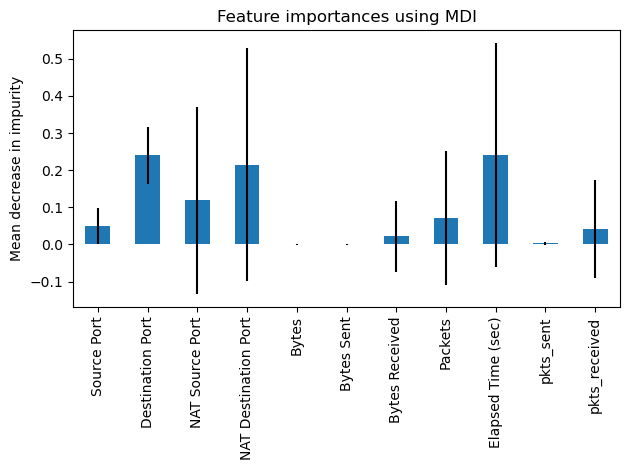

In [224]:



feature_names2 = [f"feature {i}" for i in range(x_train2.shape[1])]
forest2 = RandomForestClassifier(random_state=42, n_estimators= 28 ,criterion= 'entropy',)
forest2.fit(x_train2, y_train2)


start_time = time.time()
importances2 = forest2.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in forest2.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances2 = pd.Series(importances2, index=x_train2.columns)

fig, ax = plt.subplots()
forest_importances2.plot.bar(yerr=std2, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## SVM (all features)

In [225]:

svm2 = SVC()
svm_params2 = [{'kernel':['linear'], 'C':[0.1, 1, 5, 10, 50]}]

#training
svm_grid2 = GridSearchCV(estimator = svm2, param_grid = svm_params2, cv=5)
svm_grid2.fit(x_train2, y_train2)

print('SVM Best Params:', svm_grid2.best_params_)
print('SVM Best Score:', svm_grid2.best_score_)

#testing
svm_grid_pred2 = svm_grid2.predict(x_test2)
print(classification_report(y_test2, svm_grid_pred2))

# สรุป

- Performance
-- ทั้ง KNN, Random Forest และ SVM มี Accuracy เพิ่มขึ้นอย่างมาก เมื่อใช้ ข้อมูล Port และ NAT เข้ามาร่วมเป็น Features

- ระยะเวลาในการรัน Model 
-- KNN มีระยะเวลารันเร็วกว่ามาก เมื่อเทียบกับ Random Forest และ SVM (เนื่องจากรูปแบบของ Model ที่ไม่มี Model) แต่อาจทำได้ไม่ดีในการ Predict Action ที่เป็น reset-both, แต่ด้วยความที่ระยะเวลาในการ Predict Firewall Action ต้องการความเร็วมากจนแทบจะ Realtime สิ่งนี้อาจจะเป็น Trade-off ที่จะเลือกพัฒนา KNN Model ต่อไปให้ Accuracy ดีขึ้นได้







In [ ]:
เอาเข้าdata เข้า pipeline
1
2
3
4
5
6
วัด
f1
...


รอเช็คอีกที
- การพัฒนาต่อ
-- จากที่ดู Features Importance ใน Ramdom Forest Model Features "Bytes", "Bytes Sent", "Bytes Received", "Packets Sent" มีค่าต่ำมาก ซึ่งอาจจะสา
